In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from scipy.signal import argrelextrema

sns.set()

metro_data = pd.read_csv('datasets/metro_norm_zhvi.csv').drop(columns = ['Unnamed: 0'])
metro_data = metro_data[metro_data['Date'] < '2015']
metro_data = metro_data[metro_data['Date'] > '2010']

In [2]:
THRESHOLD = -0.002

def my_min(city):
    city_df = metro_data[metro_data['MetroName'] == city]
    my_zhvi = city_df['Normalised_ZHVI'].to_numpy()

    min_indeces = argrelextrema(my_zhvi, np.less)[0]
    min_vals = [my_zhvi[val] for val in min_indeces]
    min_dates = [city_df['Date'].to_numpy()[val] for val in min_indeces]


    curr_index = 0

    for i in range(len(min_vals)):
        if i == len(min_vals) - 1:
            curr_index = len(min_vals) - 1
            break
        else:
            if np.diff([min_vals[i], min_vals[i + 1]]) <= THRESHOLD: curr_index += 1
            else:
                curr_index = i
                break

    return min_dates[curr_index]

my_min('Ames, IA')


'2011-05-31'

In [3]:
def plot_my_min(city):
    city_df = metro_data[metro_data['MetroName'] == city]
    my_zhvi = city_df['Normalised_ZHVI'].to_numpy()

    min_indeces = argrelextrema(my_zhvi, np.less, order = 1)[0]
    min_vals = [my_zhvi[val] for val in min_indeces]
    min_dates = [city_df['Date'].to_numpy()[val] for val in min_indeces]
    
    plt.figure(figsize = (6, 3))
    plt.title('Normalised ZHVI in ' + city)
    plt.xticks(rotation = 'vertical')
    plt.plot(pd.to_datetime(city_df['Date']).dt.date, city_df['Normalised_ZHVI'], color = 'black')
    plt.scatter(min_dates, min_vals, color = 'blue')
    plt.scatter(min_dates[min_dates.index(my_min(city))], min_vals[min_dates.index(my_min(city))], color = 'red')
    plt.show()

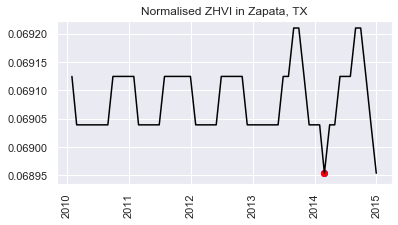

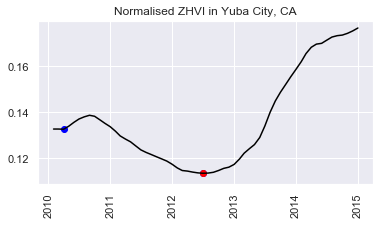

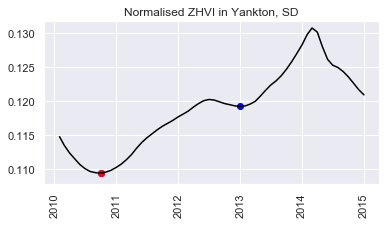

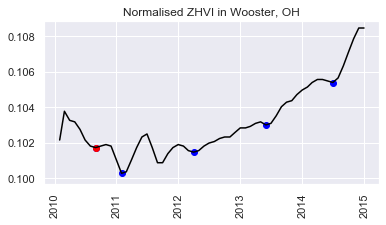

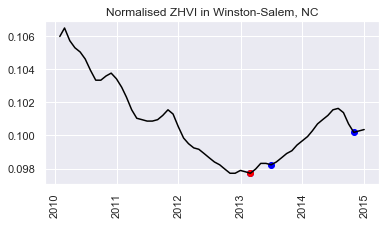

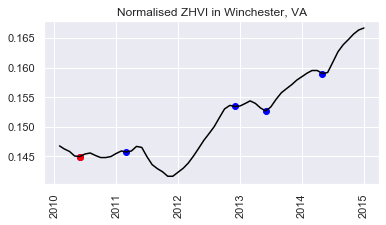

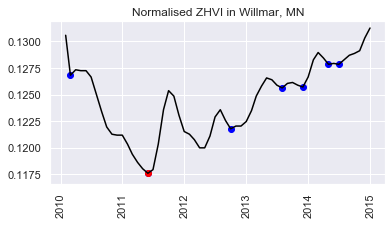

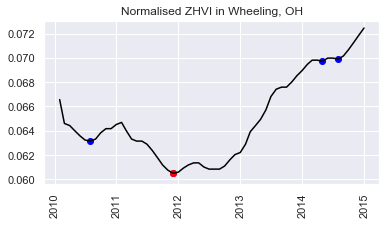

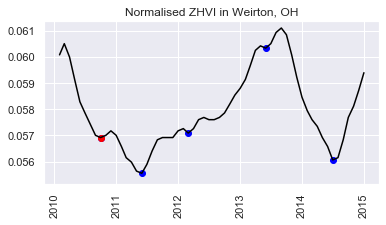

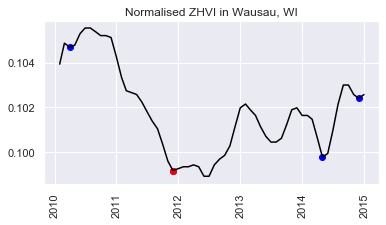

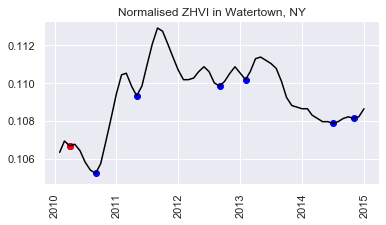

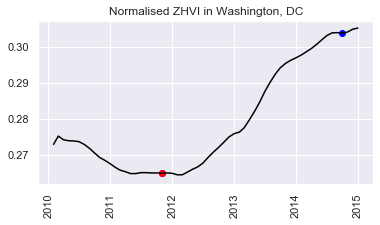

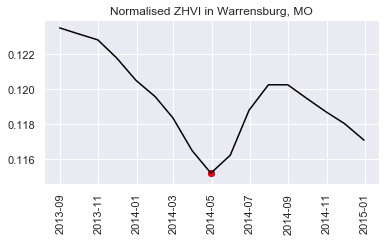

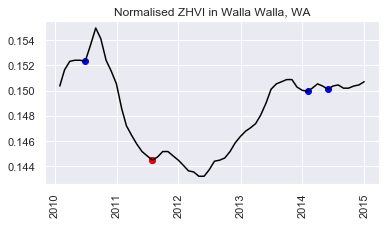

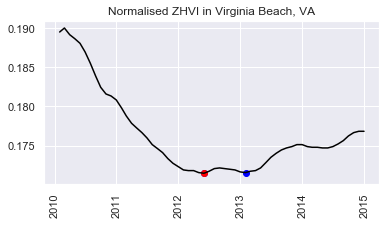

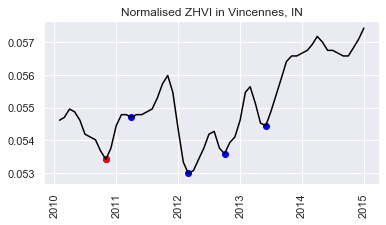

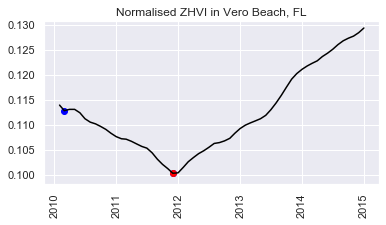

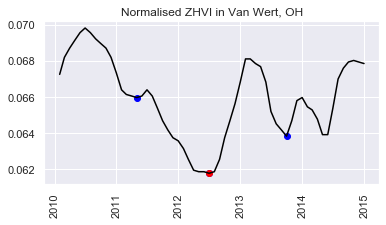

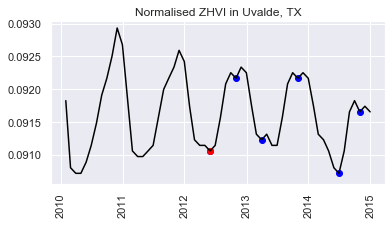

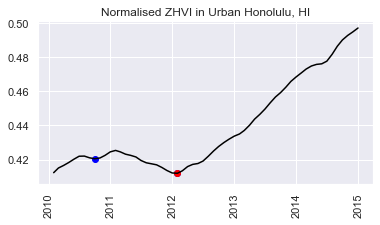

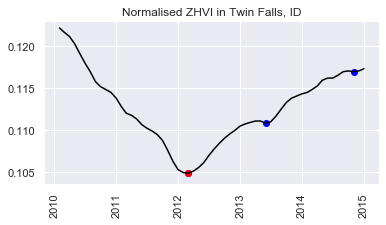

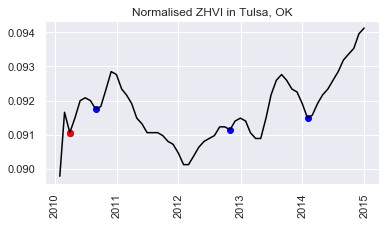

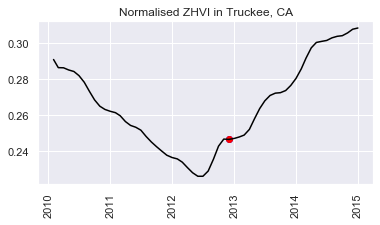

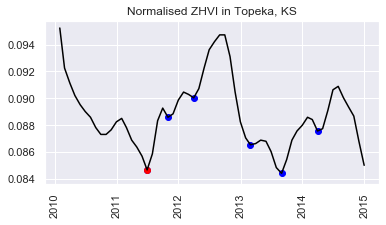

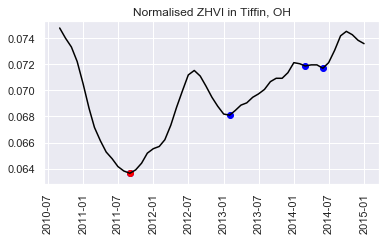

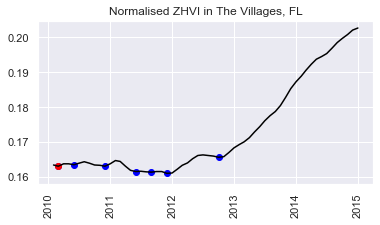

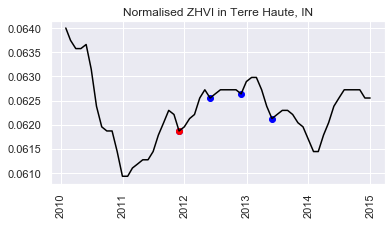

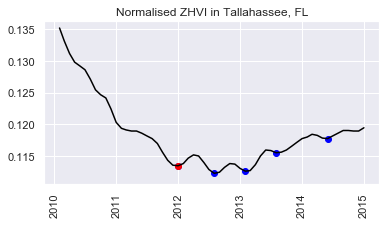

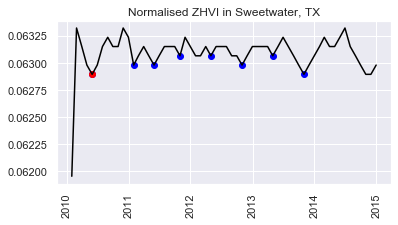

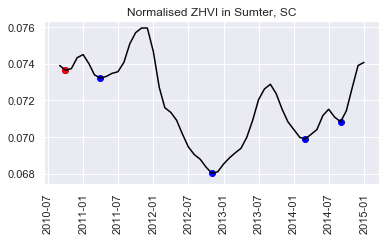

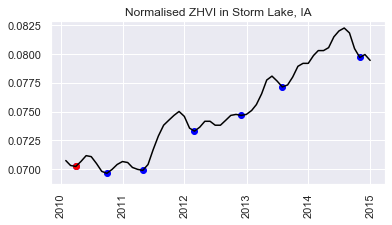

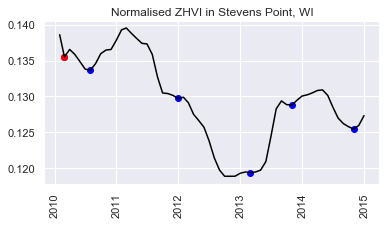

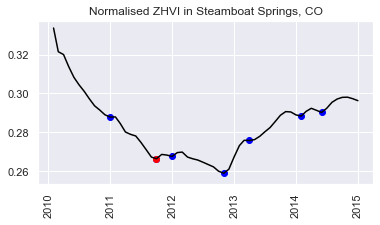

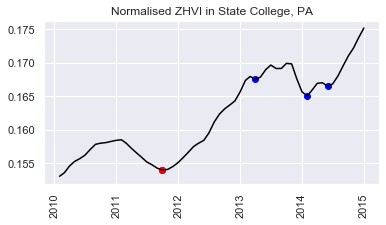

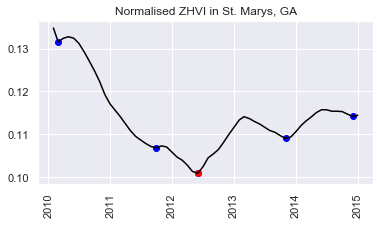

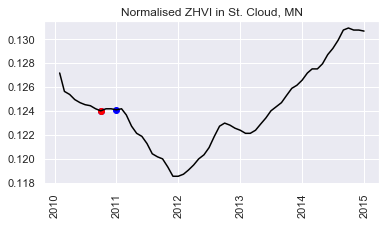

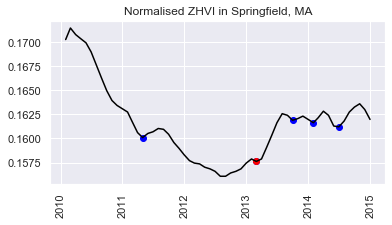

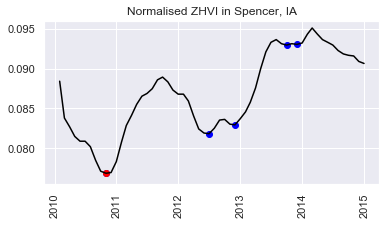

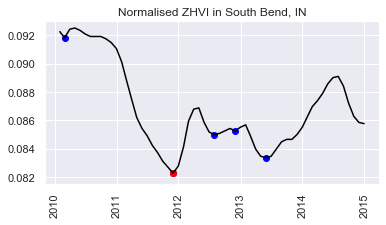

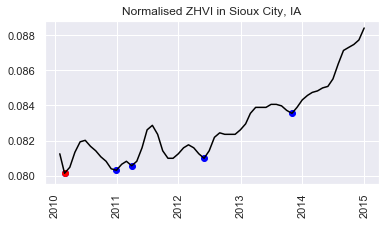

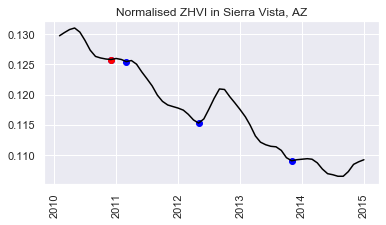

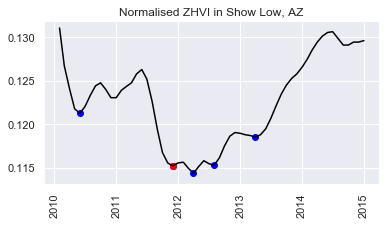

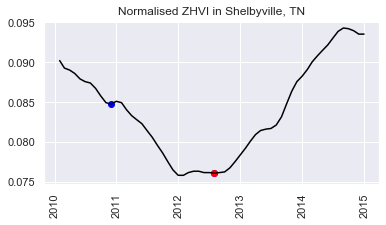

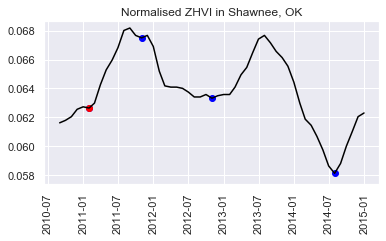

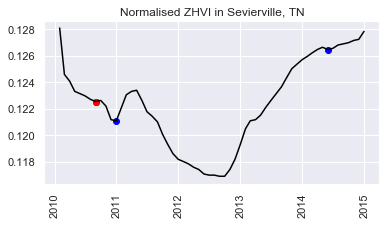

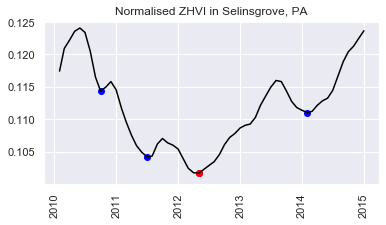

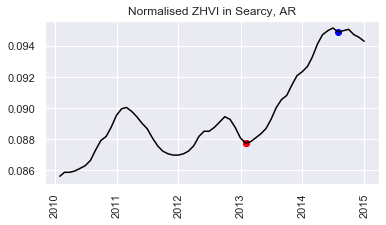

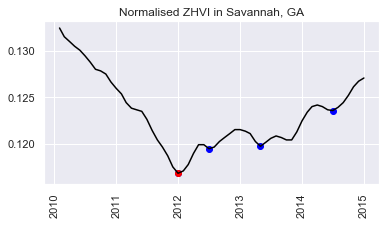

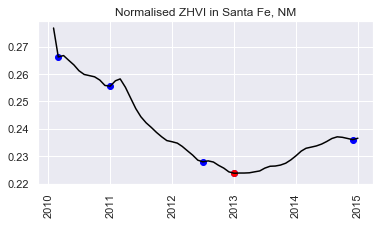

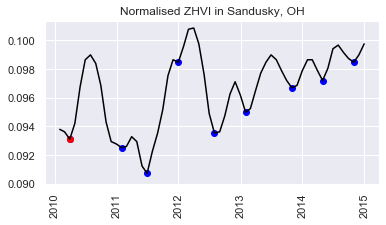

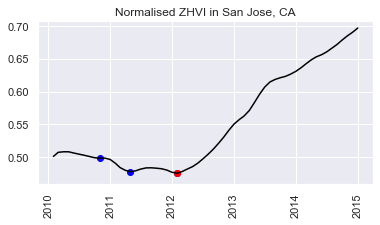

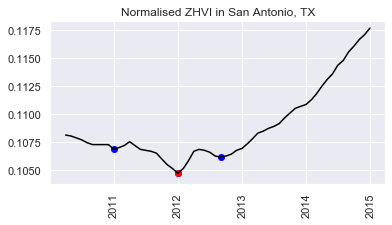

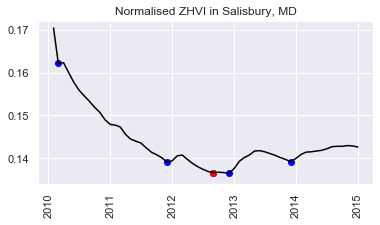

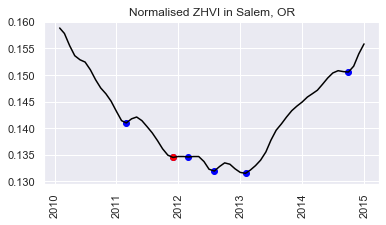

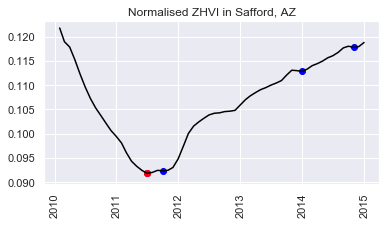

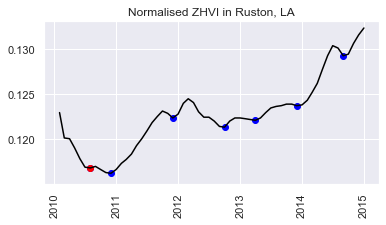

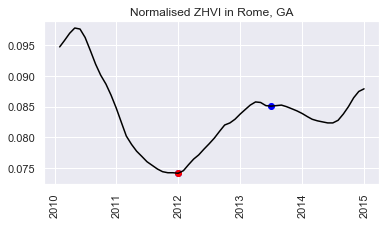

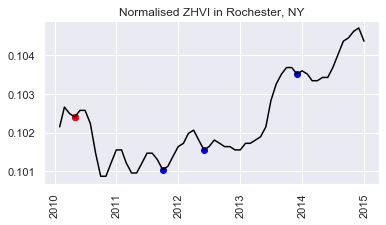

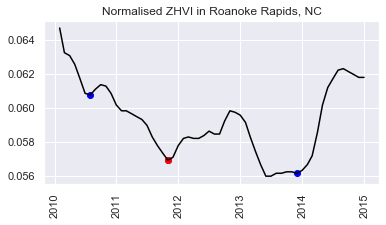

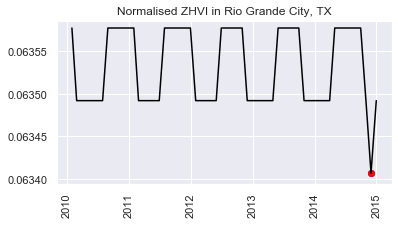

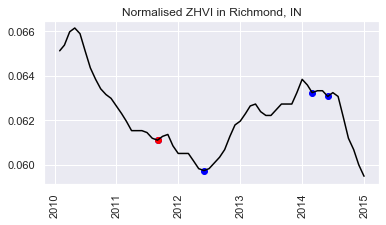

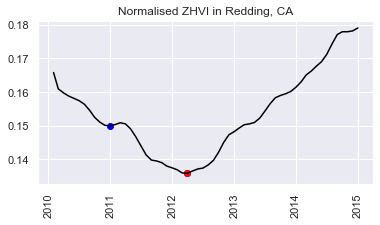

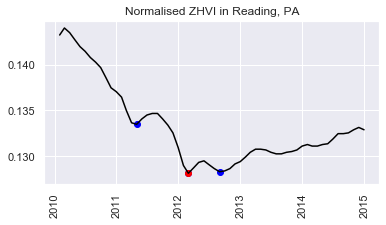

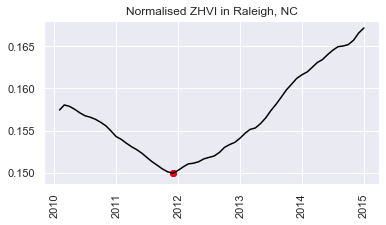

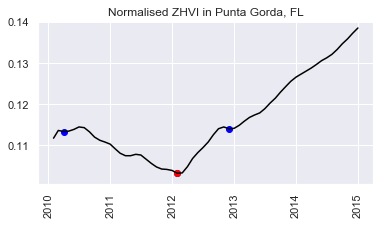

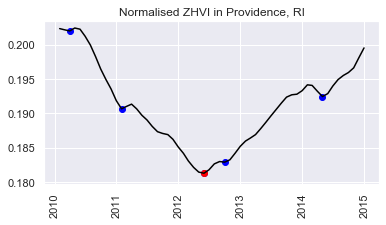

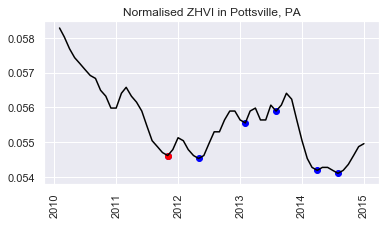

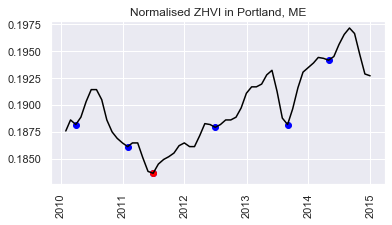

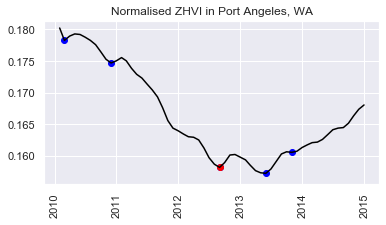

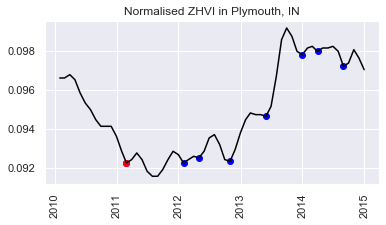

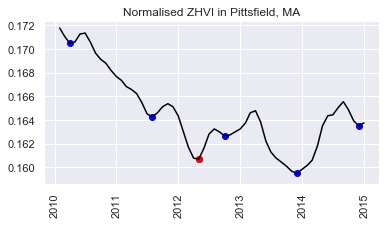

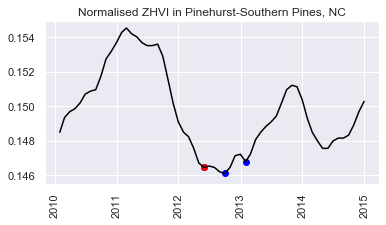

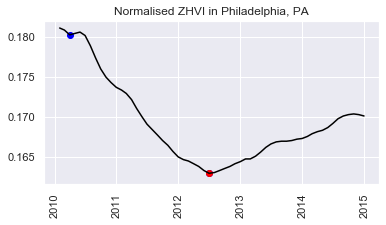

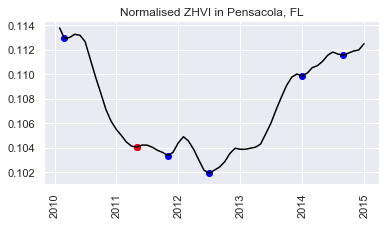

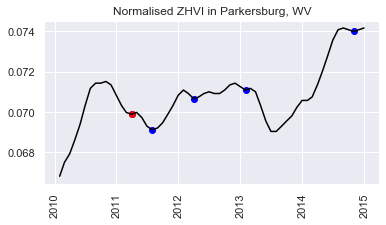

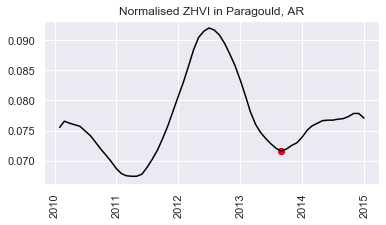

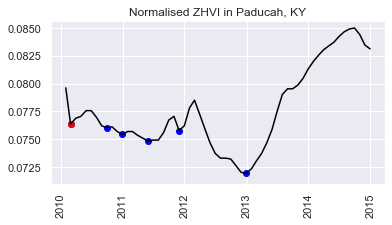

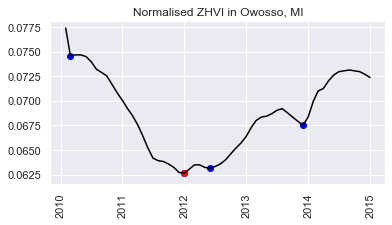

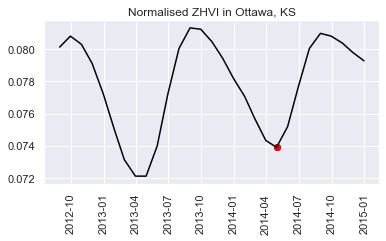

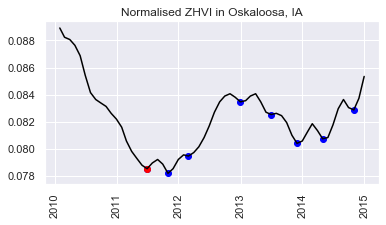

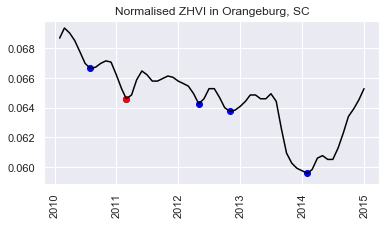

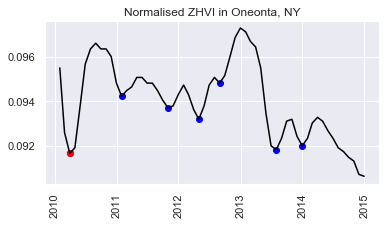

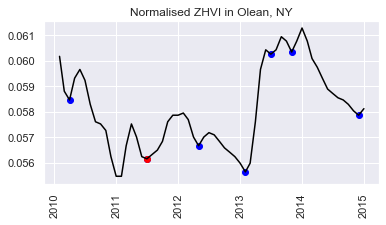

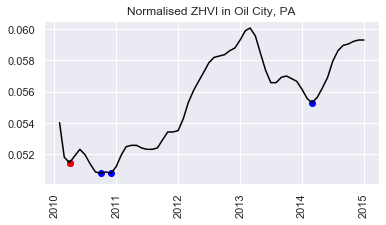

IndexError: list index out of range

In [4]:
my_cities = np.unique(metro_data['MetroName'])[::-3]

for city in my_cities:
    plot_my_min(city)